In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchsummary import summary

In [3]:
df = pd.read_csv("C:/Users/하태권/Downloads/diabetes.csv") #데이터 로딩
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# 데이터와 타겟 분리
X = df.drop(['BMI','Outcome'], axis=1).values
y = df['BMI'].values

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((614, 7), (154, 7), (614,), (154,))

In [15]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [17]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614,), (154,))

In [19]:
class DiabetesDense(nn.Module):
    def __init__(self):
        super(DiabetesDense, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = DiabetesDense()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
model.train()
for epoch in range(50):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")

print("Training complete.")

Epoch 1, Loss: 41.0960
Epoch 2, Loss: 41.8255
Epoch 3, Loss: 41.2130
Epoch 4, Loss: 42.0040
Epoch 5, Loss: 43.3687
Epoch 6, Loss: 40.4796
Epoch 7, Loss: 41.0417
Epoch 8, Loss: 39.7615
Epoch 9, Loss: 40.3914
Epoch 10, Loss: 38.8222
Epoch 11, Loss: 38.8812
Epoch 12, Loss: 39.8249
Epoch 13, Loss: 38.3058
Epoch 14, Loss: 38.7285
Epoch 15, Loss: 38.0826
Epoch 16, Loss: 38.4322
Epoch 17, Loss: 38.2816
Epoch 18, Loss: 37.3649
Epoch 19, Loss: 37.6284
Epoch 20, Loss: 37.5946
Epoch 21, Loss: 37.7465
Epoch 22, Loss: 37.5741
Epoch 23, Loss: 38.9600
Epoch 24, Loss: 37.9354
Epoch 25, Loss: 37.6082
Epoch 26, Loss: 37.1904
Epoch 27, Loss: 36.4418
Epoch 28, Loss: 36.6679
Epoch 29, Loss: 36.1063
Epoch 30, Loss: 39.0953
Epoch 31, Loss: 35.9618
Epoch 32, Loss: 36.7221
Epoch 33, Loss: 36.2095
Epoch 34, Loss: 35.2398
Epoch 35, Loss: 37.2327
Epoch 36, Loss: 35.2623
Epoch 37, Loss: 35.4838
Epoch 38, Loss: 35.1940
Epoch 39, Loss: 35.4308
Epoch 40, Loss: 35.6561
Epoch 41, Loss: 35.1656
Epoch 42, Loss: 35.2621
E

In [27]:
model.eval()
preds, actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).cpu().numpy()
        preds.extend(outputs)
        actuals.extend(y_batch.numpy())

mse = mean_squared_error(actuals, preds)
print(f"Test MSE: {mse:.4f}")

Test MSE: 48.2716


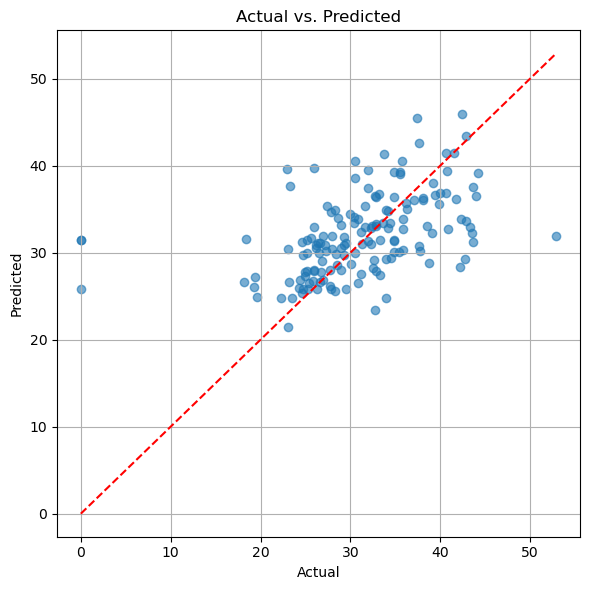

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(actuals, preds, alpha=0.6)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--')  # 대각선 기준선
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()